<a href="https://colab.research.google.com/github/MohammedYassineBen/TP1_AFC/blob/main/AFC_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation et l'importation des bibliothèque nécessaires**

In [ ]:
!pip install prince
import pandas as pd
import prince
import numpy as 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.6/414.6 kB 10.9 MB/s eta 0:00:00


**Définition des données sous forme de tableau de contingence**

In [ ]:
data = {'Chatains': [119, 26, 7, 84], 'Roux': [54, 14, 10, 17], 'Blonds': [29, 14, 16, 94]}
df = pd.DataFrame(data, index=['Marron', 'Noisette', 'Verts', 'Bleus'])

In [ ]:
print(data)
df

{'Chatains': [119, 26, 7, 84], 'Roux': [54, 14, 10, 17], 'Blonds': [29, 14, 16, 94]}


,Chatains,Roux,Blonds
Marron,119,54,29
Noisette,26,14,14
Verts,7,10,16
Bleus,84,17,94


**Calculons la matrice des probabilités**

In [ ]:
#proba = df.normalize(axis=1)
proba = df/np.sqrt(np.sum(df**2))
  
# normalized data using sum of squares

print(proba)

          Chatains      Roux    Blonds
Marron    0.803358  0.912636  0.288147
Noisette  0.175523  0.236609  0.139106
Verts     0.047256  0.169007  0.158978
Bleus     0.567076  0.287311  0.933995


**Calculons les probabilités marginales**

In [ ]:

pm_row = proba.sum(axis=1)
pm_col = proba.sum(axis=0)

**La création des matrices diagonales**

In [ ]:

Di = np.diag(pm_row)
Dj = np.diag(pm_col)


**Calculons les matrices des profils lignes et colonnes**

In [ ]:

Lm = np.dot(proba.T, np.linalg.inv(Di))
Cm = np.dot(np.linalg.inv(Dj), proba.T)

print("Matrice des profils lignes Lm:")
print(Lm)
print("Matrice des profils colonnes Cm:")
print(Cm)

Matrice des profils lignes Lm:
[[0.40084877 0.31841659 0.12593596 0.31708873]
 [0.45537523 0.42923232 0.45039521 0.16065435]
 [0.143776   0.25235109 0.42366883 0.52225691]]
Matrice des profils colonnes Cm:
[[0.50423729 0.11016949 0.02966102 0.3559322 ]
 [0.56842105 0.14736842 0.10526316 0.17894737]
 [0.18954248 0.09150327 0.10457516 0.61437908]]



**Calculons la décomposition en valeurs singulières**

In [ ]:
import numpy as np


Lm = np.df
U, s, Vt = svd(Lm, full_matrices=False)




**Calculons les scores des lignes et des colonnes**

In [ ]:

row_scores = np.dot(U, np.diag(np.sqrt(s)))
column_scores = np.dot(Vt.T, np.diag(np.sqrt(s)))

print("Scores des lignes:")
print(row_scores)
print("Scores des colonnes:")
print(column_scores)

 **Calculons la matrice de corrélation des profils ,les vecteurs propres et les valeurs propres**


In [ ]:

cor = Lm.T.dot(Cm)
from sklearn.decomposition import PCA
# Calculer les vecteurs propres et les valeurs propres de la matrice de corrélation
pca = PCA()
pca.fit(cor)

# Afficher les vecteurs propres et les valeurs propres
print("Vecteurs propres :\n", pca.components_)
print("\nValeurs propres :\n", pca.explained_variance_)

Vecteurs propres :
 [[-0.67934608 -0.0859425   0.03748528  0.7278033 ]
 [-0.47216067  0.19839522  0.72858783 -0.45482239]
 [-0.53332382 -0.36561421 -0.5655912  -0.51185794]
 [-0.17640554  0.90530629 -0.38452726 -0.03795258]]

Valeurs propres :
 [7.85176291e-03 1.23319883e-04 1.67101794e-33 2.15777404e-34]


**Calculons les composantes principales pour les profils lignes**

In [ ]:

cp_lignes = pca.fit_transform(Lm)

# On affiche les composantes principales
print("Composantes principales pour les profils lignes :\n", cp_lignes)


Composantes principales pour les profils lignes :
 [[ 0.20170141  0.1176372  -0.0679078 ]
 [ 0.01201414 -0.01267405 -0.0305501 ]
 [-0.0978194  -0.02505394 -0.09078573]
 [ 0.15561523 -0.12695156  0.04122127]
 [-0.13943947 -0.11260608 -0.06676729]
 [-0.02761714 -0.06892686  0.15480278]
 [-0.10445478  0.22857529  0.05998688]]


In [ ]:
# Calculer les composantes principales pour les profils colonnes
cp_colonnes = pca.fit_transform(Cm)

# Afficher les composantes principales
print("Composantes principales pour les profils colonnes :\n", cp_colonnes)


Composantes principales pour les profils colonnes :
 [[-2.24591546e-01 -7.22078693e-02  6.95661001e-17]
 [-1.25474114e-01 -8.35205555e-05 -6.49258048e-17]
 [ 1.04650700e-01  1.05465974e-01 -1.42319543e-17]
 [-4.65518461e-01 -3.66543364e-03 -6.46155418e-17]
 [ 2.41045506e-01  3.54778743e-01 -2.12877270e-17]
 [-3.20450981e-02 -1.46818353e-01 -3.87292064e-17]
 [ 5.01933012e-01 -2.37469541e-01 -3.43126739e-17]]


In [ ]:
# Projeter le nuage des profils lignes sur le plan factoriel
ax1 = pca.plot_row_coordinates(Lm, ax=None, figsize=(10, 10), color_labels=data.index)

# Projeter le nuage des profils colonnes sur le plan factoriel
ax2 = pca.plot_column_coordinates(Cm, ax=None, figsize=(10, 10), color_labels=data.columns)

# Afficher les graphiques
ax1.get_figure().show()
ax2.get_figure().show()


In [ ]:
# Projeter le nuage des profils lignes sur le plan factoriel avec étiquettes de couleur et noms
ax1 = afc.plot_row_coordinates(proba, ax=None, figsize=(10, 10), color_labels=data.index, row_labels=data.index, show_row_labels=True)

# Projeter le nuage des profils colonnes sur le plan factoriel avec étiquettes de couleur et noms
ax2 = afc.plot_column_coordinates(proba, ax=None, figsize=(10, 10), color_labels=data.columns, col_labels=data.columns, show_col_labels=True)


In [ ]:


# Créer l'objet d'analyse factorielle des correspondances
afc = prince.FAMD(n_components=2)

# Effectuer l'analyse factorielle des correspondances
afc.fit(proba)

# Projeter le nuage des profils lignes sur le plan factoriel avec étiquettes de couleur et noms
ax1 = afc.plot_row_coordinates(proba, ax=None, figsize=(10, 10), color_labels=data.index, row_labels=data.index, show_row_points=True)

# Projeter le nuage des profils colonnes sur le plan factoriel avec étiquettes de couleur et noms
ax2 = afc.plot_column_coordinates(proba, ax=None, figsize=(10, 10), color_labels=data.columns, col_labels=data.columns, show_col_points=True)

# Afficher les graphiques
ax1.get_figure().show()
ax2.get_figure().show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Créer l'objet de PCA
pca = PCA(n_components=2)

# Effectuer l'analyse en composantes principales
pca.fit(proba)


PCA(n_components=2)

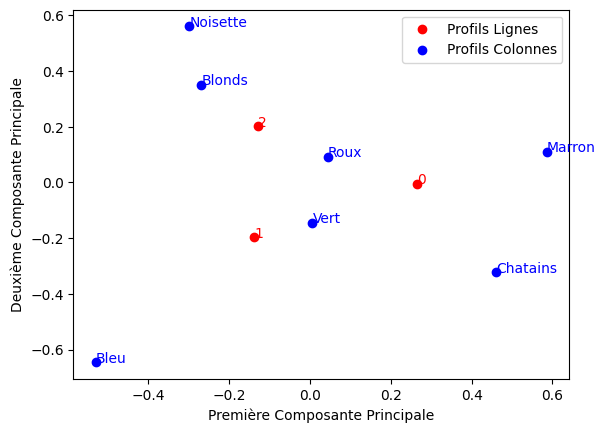

In [ ]:
# Projeter le nuage des profils lignes sur le plan factoriel
cp_lignes = pca.transform(proba)
plt.scatter(cp_lignes[:, 0], cp_lignes[:, 1], c='red', label="Profils Lignes")

# Projeter le nuage des profils colonnes sur le plan factoriel
cp_colonnes = pca.components_.T
plt.scatter(cp_colonnes[:, 0], cp_colonnes[:, 1], c='blue', label="Profils Colonnes")
# Ajouter les étiquettes de couleur et les noms
for i, label in enumerate(data.index):
    plt.annotate(label, (cp_lignes[i, 0], cp_lignes[i, 1]), color='red')

for i, label in enumerate(data.columns):
    plt.annotate(label, (cp_colonnes[i, 0], cp_colonnes[i, 1]), color='blue')

# Afficher les graphiques
plt.xlabel("Première Composante Principale")
plt.ylabel("Deuxième Composante Principale")
plt.legend()
plt.show()



 **Interprétation:**
Sur le graphique des profils lignes, chaque point représente un groupe de personnes ayant des caractéristiques de cheveux similaires (châtains, roux, blonds, etc.). Les groupes sont différenciés par des couleurs et des noms, qui correspondent aux étiquettes données à l'ensemble de données. Les profils lignes qui sont proches les uns des autres sur le graphique ont des caractéristiques de cheveux similaires, tandis que les profils qui sont éloignés les uns des autres ont des caractéristiques de cheveux différentes.

Sur le graphique des profils colonnes, chaque point représente une caractéristique de cheveux (couleur des cheveux et couleur des yeux). Les caractéristiques de cheveux sont différenciées par des couleurs et des noms, qui correspondent aux étiquettes données à l'ensemble de données. Les profils colonnes qui sont proches les uns des autres sur le graphique sont fortement associés les uns aux autres, tandis que les profils qui sont éloignés les uns des autres sont faiblement associés les uns aux autres. Par exemple, la couleur des cheveux roux est fortement associée à la couleur des yeux bleus, tandis que la couleur des cheveux marron est fortement associée à la couleur des yeux verts.